In [1]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/_scripts")

import os
from main.main import SVG2Plan

from reader.svg_reader import SVGReader
from adjacencies.adjacency import AdjacencyGenerator

from placement.executer import PlacementExecuter

from svg_helpers.saver import Saver, read_layout
from svg_helpers.plotter import Plotter
from svg_helpers.layout import Layout

from problems.reporter import Reporter
from problems.classes.sequence import Sequence
from problems.sequence_runner import SequenceRunner

In [2]:
svg_name = "amber_a_f01.svg"
svg_name = "amber_b_f01.svg"

sv = SVGReader(svg_name)
sv.run()

No reference for svg to meters conversion!! 


In [3]:
ag = AdjacencyGenerator(sv.domains)
ag.run()

In [4]:
pl = PlacementExecuter(ag.layout)
pl.run()

---m_bath has no western nbs that are unplaced
matching a south corner! NOTE this was changed for amber b!
fpr wic, there is no west node
changing north node reference to 1. Number of unplaced nodes is 4
fpr kitchen, there is no west node
changing north node reference to 2. Number of unplaced nodes is 2
fpr dining, there is no west node
no more nodes to place


In [5]:
re = Reporter(pl.layout)
re.run()
seq = Sequence(0, pl.layout, re.problems, [])
sr = SequenceRunner(seq, re.problems[0])
sr.run()

-- Unresolved Problems. Overlaps: 2. Holes: 1. Sideholes: 0
--iteration #1
curr problem = Problem(index=1, problem_type=ProblemType.HOLE, resolved=False, nbs=['wic', 'transit_1', 'm_bath', 'm_bedroom'], x_left=1.87)
Action(problem=((1, 'HOLE')), action_type=ActionType.STRETCH, node=wic, distance=1.21)


AttributeError: 'Polygon' object has no attribute 'geoms'

In [12]:
pl = Plotter(sr.layout.corners)
pl.plot()

In [34]:
re2 = Reporter(sr.layout)
re2.run()
len(re2.problems)

No EW relation
This is not an EW side hole
-- Unresolved Problems. Overlaps: 0. Holes: 1. Sideholes: 0


1

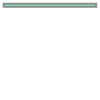

In [10]:
re.problems[2].geometry

In [6]:
sr.layout.corners

NameError: name 'sr' is not defined

In [54]:
[i for i in sr.layout.corners["dining"]][1].getcontext()

AttributeError: 'decimal.Decimal' object has no attribute 'getcontext'

In [56]:
for corner in sr.layout.corners.values():
    for num in corner:
        assert num.is_finite()
        if num >= 10 or num <= -10:
            assert len(num.as_tuple().digits) <= 4
        elif -10 < num < 10: 
            assert len(num.as_tuple().digits) <= 3

DecimalCorners(x_left=0, x_right=Decimal('3.08'), y_bottom=Decimal('-3.33'), y_top=0)


AttributeError: 'int' object has no attribute 'is_finite'